<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل دوم: رگرسیون خطی
    </font>
    <br>
      نویسندگان:‌ سید امیرمحمد عیسی زاده
    <hr>
<br>
  <div align="right">
  <font color="red" size=5>فهرست مطالب</font>
	<ul>
        <li>
        <a href="#lr_from_scratch">
            رگرسیون خطی از پایه
        </a>
        <ul>
            <br>
            <li>
                <a href="#lr_closed_form">
                  فرم بسته رگرسیون خطی
                </a>
            </li>
            <br>
            <li>
                <a href="#lr_optimization">
                  رگرسیون خطی با استفاده از optimization function
                </a>
            </li>
            <br>
            <li>
                <a href="#gradient_descent">
                  Gradient Descent
                </a>
            </li>
            <br>
            <li>
                <a href="#model_training">
                  آموزش مدل
                </a>
            </li>
        </ul>
    </li>
    <br>
    <li>
        <a href="#lr_sklearn">
            رگرسیون خطی با استفاده از sklearn
        </a>
    </li>
    <br>
    <li>
      <a href="#beyond_linear">
        فراتر از linear regression
      </a>
        <ul>
            <br>
            <li>
                <a href="#lasso">
            Lasso Regression
                </a>
            </li>
            <br>
            <li>
                <a href="#ridge">
            Ridge Regression
                </a>
            </li>
            <br>
            <li>
                <a href="#elasticnet">
                    Elastic Net
                </a>
            </li>
            <br>
            <li>
                <a href="#ridge_vs_lasso">
                    Ridge vs Lasso
                </a>
            </li>
        </ul>
	</li>
    <br>
    <br>
</div>


  <div dir=rtl id="lr_from_scratch">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        رگرسیون خطی از پایه
      </font>
      <hr />
در این قسمت ما از یک دیتاست ساده برای تخمین میزان محصول دو میوه(سیب  و پرتقال) با توجه به پارامترهای دما، میزان بارش و رطوبت در چندین منطقه استفاده میکنیم.
    <br>
      به این منظور دیتاست ساده‌ای را میسازیم:
    </font>
      


In [2]:
# We use numpy to define our inputs and targets
import numpy as np

In [3]:
# dataset (temp, rainfall, humidity, apples, oranges)
df = np.array([[73, 67, 43, 56, 70], 
                   [91, 88, 64, 81, 101], 
                   [87, 134, 58, 119, 133], 
                   [102, 43, 37, 22, 37], 
                   [69, 96, 70, 103, 119]], dtype='float32')

# reigons which are used as indexes
regions = ["Semnan", "Golestan", "Gilan", "Ghazvin", "Mazandaran"]

columns = ["Temp(F)", "Rainfall(mm)", "Humidity(%)", "Apples(ton)", "Oranges(ton)"]


  <div dir=rtl>
    <font face="XB Zar" size=4>
برای نمایش دیتاست از کتابخانه pandas استفاده میکنیم:
    </font>
      


In [4]:
import pandas as pd

In [5]:
# Creating dataframe using variable columns as columns and regions as index
df = pd.DataFrame(df, columns=columns, index=regions)

df

,Temp(F),Rainfall(mm),Humidity(%),Apples(ton),Oranges(ton)
Semnan,73.0,67.0,43.0,56.0,70.0
Golestan,91.0,88.0,64.0,81.0,101.0
Gilan,87.0,134.0,58.0,119.0,133.0
Ghazvin,102.0,43.0,37.0,22.0,37.0
Mazandaran,69.0,96.0,70.0,103.0,119.0


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
در رگرسیون خطی، هر مقدار خروجی(ستون‌های سیب و پرتقال)، به صورت جمع وزن‌داری از ستون‌های ورودی به اضافه یک مقدار ثابت در نظر گرفته میشوند:
      <br>
    </font>

```
apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
```

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
که به‌این معناست که خروجی‌های ما یک تابع خطی یا یک صفحه از ورودی‌ها است:
      <br>
    </font>

<div class="center">
<img src="linear-regression-graph.png" width="500"/>
</div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
عملا فرم ماتریس خروجی(Y) به این شکل است:
      <br>
      <br>
      <font color="black" size=5>
          $$X \qquad * \qquad W \qquad + \qquad b \\$$
          $$
\begin{bmatrix}
      73 & 67 & 43 \\
      91 & 88 & 64 \\
      \vdots & \vdots & \vdots \\
      69 & 96 & 70 \\
\end{bmatrix}
*
\begin{bmatrix}
      w_{11} & w_{21} \\
      w_{12} & w_{22} \\
      w_{13} & w_{23} \\
\end{bmatrix}
+
\begin{bmatrix}
      b_1 & b_2 \\
      b_1 & b_2 \\
      \vdots & \vdots \\
      b_1 & b_2 \\
\end{bmatrix}
$$
          </font>
    </font>
    </div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      دیتاست را به دو بخش X و Y قسمت میکنیم که X همان ورودی‌های ما و Y میزان بهره‌برداری از میوه‌ها یا همان خروجی‌ها هستند.
      <br>
    </font>

In [6]:
X = df.iloc[:, :3].to_numpy()
Y = df.iloc[:, 3:].to_numpy()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
نکته شایان توجه این است که b فقط مقداری ثابت به حاصل ضرب اضافه می‌کند، پس اگر به ابتدای تمامی سطرهای X مقدار 1 را اضافه کنیم و به ابتدای هر ستون ماتریس W مقدار بایاس متناظر با آن را اضافه کنیم خروجی هیچ تغییری نخواهد کرد.
      <br>
    </font>

In [7]:
X = np.append(np.ones((5, 1)), X , axis=1)
X

array([[  1.,  73.,  67.,  43.],
       [  1.,  91.,  88.,  64.],
       [  1.,  87., 134.,  58.],
       [  1., 102.,  43.,  37.],
       [  1.,  69.,  96.,  70.]])

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
بدست آوردن بهترین وزن در رگرسیون خطی، از دو راه ممکن است:
      <ol>
            <li>فرم بسته: اگر مشتق جزئی بر حسب وزن را مساوی صفر قرار دهیم، با بدست آوردن ماتریس وزن متناظر، به بهترین پاسخ می‌رسیم.</li>
            <li>استفاده از optimization function: همچنین می‌توانیم بجای استفاده از فرم بسته، مانند اکثر مدل‌ها، مرحله مرحله جلو رفته و به بهترین وزن، نزدیک شویم.
          دقت کنید که بر خلاف رگرسیون خطی، در اکثر مدل‌ها نمی‌توان فرم بسته‌ای از پاسخ پیدا کرد.</li>
        </ol>
      <br>
    </font>


  <div dir=rtl id="lr_closed_form" align="justify">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        فرم بسته رگرسیون خطی
      </font>
      <hr />
      همانطور که در کلاس درس گفته شد، پاسخ فرم بسته بدین شکل است:
      <br>
      </font>
  </div>
      <div class="cmath"> W = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>Y</div>

In [8]:
def normal_equation(X, Y):
    W = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y))
    return W

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
این تابع همان معادله بالاست که با گرفتن ورودی X و Y،خروجی W را به ما می‌دهد.
      <br>
    </font>

In [9]:
# .dot() represent matrix multiplication in numpy
def lr_predict(X, W):
    return np.dot(X, W)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
این تابع برای محاسبه مقادیر Y با استفاده از X و وزن‌های فعلی است.
      <br>
      حال دو تابع بالا را در یک مدل تعریف می‌کنیم. ابتدا بهترین وزن را بدست می‌آوریم و سپس مقدار Y را پیش‌بینی می‌کنیم.
      <br>
    </font>

In [10]:
def closed_form_lr(X, Y):
    W = normal_equation(X, Y)
    predictions = lr_predict(X, W)
    return predictions

In [11]:
predictions = closed_form_lr(X, Y)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
حال معیاری برای میزان خطای مدل، تعریف میکنیم.
      <br>
      ما از معیار MSE(mean squared error) استفاده میکنیم که اخلاف توان دو پیش بینی‌ها نسبت به مقدار واقعی خروجی‌ها است.
      <br>
    </font>

In [12]:
# MSE loss
def mse_loss(pred, real):
    diff = pred - real
    return np.sum(diff * diff) / diff.size

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
تابع sum تمامی عناصر آن آرایه را با هم جمع میکند.
      در تابع mse_loss در ابتدا اختلاف‌ها را بین دو ماتریس پیدا میکنیم، سپس تمامی این اختلاف‌ها را با هم جمع میکنیم و در انتها تقسیم بر تعداد عناصر میکنیم.
      <br>
    </font>

In [13]:
mse_loss(predictions, Y)

0.4831212220582056


  <div dir=rtl id="lr_optimization" align="justify">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        رگرسیون خطی با استفاده از optimization function
      </font>
      <hr />
      آموزش مدل رگرسیون خطی، عملا همان پیدا کردن مقدار بهینه برای وزن‌ها(w11 و w12 و ... ) است. وزن‌های آموزش دیده شده، برای پیشبینی داده‌های جدید استفاده خواهند شد. سپس این کار را تکرار می‌کنیم تا رفته رفته نتایج ما بهتر شوند. برای بهتر کردن مدل، که همان پیدا کردن وزن‌های بهتر باشد، از optimizer استفاده میکنیم. optimizer مورد استفاده در این تمرین، gradient descent است.
  </font>
  </div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
حال باید به وزن‌ها مقدار اولیه بدهیم. روش‌های مختلفی برای این کار وجود دارند که ما از مقداردهی رندوم استفاده میکنیم:
      <br>
    </font>

In [14]:
# Weights
W = np.random.rand(4, 2)
W

array([[0.3340964 , 0.15729811],
       [0.43118427, 0.27434878],
       [0.68027836, 0.50680122],
       [0.54042591, 0.32601294]])

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
از تابع lr_predict که بالا تعریف کردیم، استفاده می‌کنیم.
      <br>
      این مدل را روی داده‌های ورودی، که همان X و W هستند تست میکنیم:
      <br>
    </font>

In [15]:
predictions = lr_predict(X, W)
predictions

array([[100.62751237,  68.1589975 ],
       [134.02361888,  90.58637301],
       [160.34913071, 110.84575633],
       [ 93.56262032,  61.99580526],
       [133.22234715,  90.56118721]])

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
از تابع mse_loss که بالا تعریف کردیم، استفاده می‌کنیم.
      <br>
    </font>

In [16]:
loss = mse_loss(predictions, Y)
print(loss)

1458.3668306724899


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
همانطور که از خود مقادیر عناصر پیش‌بینی شده واضح بود، اختلاف خیلی زیاد است. این اختلاف به این دلیل است که هیچ بهینه سازی‌ای در وزن‌ها انجام ندادیم و صرفا یک پیش‌بینی رندوم کردیم.
در بخش Gradient Descent نحوه بروزرسانی وزن‌ها توضیح داده شده است.
      <br>
    </font>


  <div dir=rtl id="gradient_descent" align="justify">
    <font face="XB Zar" size=4>
      <font color="red" size=5>Gradient Descent</font>
      <hr />
      مقدار loss ما یک تابع درجه دو از وزن‌ها است. و وظیفه ما این است که آن را به کمترین مقدار خودش برسانیم.
        اگر به شکل پایین دقت کنیم، و با توجه به حساب دیفرانسیل، یک نقطه را در نظر بگیرید. دو حالت برای این نقطه ممکن است:
        <br>
         شیب یا همان گرادیان مثبت باشد:
        <br>
        1) اگر مقدار کمی عقب برویم، مقدار تابع کمتر میشود.
        <br>
        2)  اگر مقدار کمی جلو برویم، مقدار تابع بیشتر میشود.
        <br>
  </div>

<div class="center">
<img src="positive gradient.png" width="500"/>
</div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         گرادیان منفی باشد:
      <br>
      1) اگر مقدار کمی عقب برویم، مقدار تابع بیشتر میشود.
      <br>
      2) اگر مقدار کمی جلو برویم، مقدار تابع کمتر میشود.
      <br>
    </font>

<div class="center">
<img src="negative gradient.png" width="500"/>
</div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
        بنابراین، در هر مرحله مقدار گرادیان را در عدد کوچکی ضرب میکنیم و وزن‌ها را از این مقدار کم میکنیم.
      این مقدار کوچک همان learning rate است که یکی از مهم ترین hyperparameter های هر مدل ماشین لرنینگ است.
      دو حالت نامطلوب برای learning rate محتمل است:
      <br>
      <ul>
  <li>مقدار کوچک‌تر از حد مطلوب: در این صورت مدل دیر همگرا میشود و مراحل بیشتری نیاز است، چون در هر مرحله مقدار بسیار کمی تغییر میکند.</li>
  <li>مقدار بیشتر از حد مطلوب: در این صورت مدل در نهایت با حالت مینیمم فاصله زیادی خواهد داشت.</li>
</ul>
      

<div class="center">
<img src="gradient_descent.avif" width="500"/>
</div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      حال که مقدار خطا را بدست آوردیم و وزن‌های فعلی را داریم، باید مقدار گرادیان را حساب کنیم.
    </font>

In [17]:
def calc_gradient(X, error):
    gradient = np.dot(X.T, error)
    return gradient

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
رابطه نوشته شده همان مقدار گرادیان است. پیشنهاد می‌شود که صحت این رابطه را بررسی کنید.
    </font>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
بعد از بدست آوردن گرادیان، باید وزن‌ها را بروزرسانی کنیم.
    </font>

In [18]:
def update_weights(W, lr, gradient):
    new_weights = W - lr * gradient
    return new_weights


  <div dir="rtl" id="model_training">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        آموزش مدل
      </font>
      <hr />
       حال که همه بخش‌های مدل را بررسی کردیم، نوبت آزمایش آن است.
        یک بار تمامی مراحل را مرور میکنیم:
        <ol>
            <li>تولید پیش بینی با استفاده از وزن‌های فعلی</li>
            <li>محاسبه مقدار loss</li>
            <li>محاسبه گرادیان‌ها با توجه به وزن‌ها</li>
            <li>آپدیت کردن وزن‌ها</li>
        </ol>
        <br>
        این کار‌ها را در چندین مرحله(epoch) انجام میدهیم.
        <br>
        حال باید تابعی را تعریف کنیم که این مراحل را انجام دهد.
       </font>
    </div>

In [19]:
def train_model_lr_gd(X, Y, W, n_epoches, lr):
    losses = []
    for i in range(n_epoches):
        # generating the predictions 
        predictions = lr_predict(X, W)
        error = predictions - Y
        # calculating the loss
        loss = mse_loss(predictions, Y)
        # adding the loss to our loss list 
        losses.append(loss)
        # calculating gradients
        gradient = calc_gradient(X, error) / Y.size
        # updating weights and biases
        W = update_weights(W, lr, gradient)
    return W, losses

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         مدلمان را در 10000 مرحله تست میکنیم و مقدار learning rate را  1e-5 میگذاریم.
      <br>
      همچنین loss ها را در هر مرحله ذخیره میکنیم.
    </font>

In [20]:
lr = 1e-5
n_epoches = 10000
W, losses = train_model_lr_gd(X, Y, W, n_epoches, lr)
print(losses[-1])

0.5235522542792108


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         همانطور که مشاهده می‌کنید مقدار loss نهایی خیلی نزدیک به مقدار بدست آمده در حالت بسته است.
    </font>

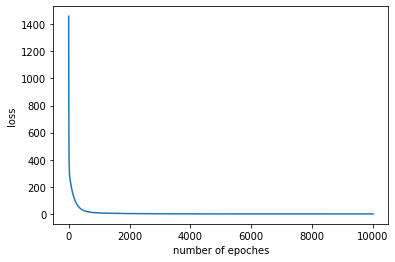

In [21]:
import matplotlib.pyplot as plt
  
# x axis values
x = [i for i in range(n_epoches)]
# corresponding y axis values
y = losses
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('number of epoches')
# naming the y axis
plt.ylabel('loss')
  
# function to show the plot
plt.show()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         همانطور که مشاهده میکنید، در ابتدا به مقدار زیادی از خطا کم میشود و رفته رفته اختلاف خطاها در هر دو مرحله متوالی کمتر میشود تا در نهایت در همسایگی کوچکی از مینیمم، تغییر کند. هر چه learning rate را کمتر کنیم طول این همسایگی کمتر میشود. (البته در مراحل بیشتری باید کار را انجام دهیم تا نتیجه مطلوبی کسب کنیم)
    </font>

   <div dir="rtl" id="lr_sklearn">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        رگرسیون خطی با استفاده از sklearn
      </font>
        <hr />
       <br>
      حال دیتاست داده شده را با استفاده از مدل آماده linear regression در sklearn یاد میگیریم.
        <br>
        این کتابخانه تابع آماده برای محاسبه خطا دارد.
       </font>
    </div>

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [23]:
X = df.iloc[:, :3].to_numpy()
Y = df.iloc[:, 3:].to_numpy()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         یک مدل رگرسیون خطی از ماژول linear_model این کتابخانه تعریف می‌کنیم.
    </font>

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
با تابع fit، مدل را بر روی داده‌ها آموزش می‌دهیم.    </font>

In [25]:
# Train the model using the training sets
regr.fit(X, Y)

LinearRegression()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
با تابع predict، از ورودی‌ها مقدار خروجی‌ها را بدست آورده و سپس میزان خطا را محاسبه می‌کنیم.    </font>

In [26]:
predictions = regr.predict(X)
predictions
mean_squared_error(Y, predictions)

0.48312175

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
همانطور که مشاهده می‌کنید میزان خطای بدست آمده بسیار نزدیک به میزان خطا در فرم بسته است!!    </font>

   <div dir="rtl" id="beyond_linear" align="justify">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        فراتر از linear regression
      </font>
        <hr />
      در رگرسیون خطی‌ای که معرفی کردیم، هیچ قانون محدود کننده‌ای روی وزن ها قرار ندادیم. این کار باعث پیچیده تر شدن مدل می‌شود که به overfitting بر روی داده train منجر می‌شود. به گذاشتن محدودیت روی وزن‌ها regularization می‌گوییم. به عبارتی وظیفه ما مینیمم کردن مجموع loss و regularization term است.
        <br>
        حال مدل‌هایی را معرفی می‌کنیم که بخش regularization را به linear regression اضافه کرده‌اند.
       </font>
    </div>

   <div dir="rtl" id="lasso" align="justify">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        Lasso Regression
      </font>
        <hr />
      در این مدل، regularization term به صورت جمع قدر مطلق وزن‌ها تعریف می‌شود.
        به عبارتی در این مدل باید تابع زیر را کمینه کنیم:
        <br>
        <br>
        <font color="black" size=5>
        $$\frac{1}{2m} \Sigma_{i=1}^{m}{(y-Xw)^2} + \alpha \Sigma_{j=1}^{p}{\mid w_j\mid}$$
            </font>
       </font>
    </div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
در lasso، به علت پنالتی‌ای که روی وزن ها قرار دارد، تمایل به کم کردن وزن ها به صورت برابر وجود دارد، به همین دلیل ماتریس وزن، sparsity بالایی دارد و تعداد زیادی از وزن ها به صفر میل می‌کنند.    
    </font>

   <div dir="rtl" id="ridge" align="justify">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        Ridge Regression
      </font>
        <hr />
      در این مدل، regularization term به صورت جمع توان دو وزن‌ها تعریف می‌شود.
        به عبارتی در این مدل باید تابع زیر را کمینه کنیم:
        <br>
        <br>
        <font color="black" size=5>
        $$\Sigma_{i=1}^{m}{(y-Xw)^2} + \alpha \Sigma_{j=1}^{p}{w_j^2}$$
            </font>
       </font>
    </div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
در ridge، بر خلاف lasso چون پنالتی بر روی توان دو وزن ها قرار دارد، وزن ها صفر نمی‌شوند و با همدیگر کم می‌شوند، چون به عنوان مثال اختلاف توان دو 4 و 2، بیشتر از اختلاف توان دو 2 و صفر هست، به همین علت همه با هم کم می‌شوند.
    </font>

   <div dir="rtl" id="elasticnet" align="justify">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        Elastic Net
      </font>
        <hr />
      در این مدل، regularization term به صورت جمع توان دو و توان یک وزن‌ها تعریف می‌شود. به عبارتی خصوصیت های ridge و lasso را در خود جمع کرده است.
        در این مدل باید تابع زیر را کمینه کنیم:
        <br>
        <br>
        <font color="black" size=5>
        $$\frac{1}{2m} \Sigma_{i=1}^{m}{(y-Xw)^2} + \alpha * ratio * \Sigma_{j=1}^{p}{\mid w_j\mid} + 0.5 * \alpha * (1-ratio) * \Sigma_{j=1}^{p}{w_j^2}$$
            </font>
       </font>
    </div>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
با تابع predict، از ورودی‌ها مقدار خروجی‌ها را بدست آورده و سپس میزان خطا را محاسبه می‌کنیم.
    <br>
      حال نمونه ای از پیاده‌سازی ElasticNet در پایتون را مشاهده می‌کنیم.
    </font>

In [27]:
class Regression:
    
    def __init__(self, regularization, lr, epoch):
        self.m = None #samples
        self.n = None #features
        self.w = None #weight
        self.b = None #bias
        self.regularization = regularization #penalty object
        self.lr = lr #learning rate
        self.epoch = epoch #iteration
        
    def __calculate_cost(self, y, y_pred):
        return (1 / (2*self.m)) * np.sum(np.square(y_pred-y)) + self.regularization(self.w)
    
    def __hypothesis(self, w, X):
        return np.dot(X, w) 
    
    def __initialization(self, X):
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.w = np.zeros((self.n,1))
        return X
    
    def __update_parameters(self, X, y, y_pred):
        dw = (1/self.m) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
        self.w = self.w - self.lr * dw
        return True
        
    def fit(self, X, y):
        X = self.__initialization(X)
        for e in range(1, self.epoch+1):
            y_pred = self.__hypothesis(self.w, X)
            cost = self.__calculate_cost(y, y_pred)
            self.__update_parameters(X, y, y_pred)
            if e % 5000 == 0:
#                 print(f"The Cost in iteration {e}----->{cost} :)")
                pass

        return True

    def predict(self, X_test):
        X_test = np.insert(X_test, 0 , 1, axis= 1)
        y_pred = self.__hypothesis(self.w, X_test)
        return y_pred

class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, w):
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(w))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(w))
        return (l1_contribution + l2_contribution)

    def derivation(self, w):
        l1_derivation = self.l * self.l_ratio * np.sign(w)
        l2_derivation = self.l * (1 - self.l_ratio) * w
        return (l1_derivation + l2_derivation)

class ElasticNet(Regression):
    
    def __init__(self, l, l_ratio, lr, epoch):
        self.regularization = ElasticPenalty(l,l_ratio)
        super().__init__(self.regularization, lr, epoch)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
نکته بسیار مهم این است که اگر مقدار l_ratio در پارامتر ها برابر با صفر باشد، مدل تبدیل به Ridge می‌شود و اگر برابر با یک باشد مدل تبدیل به Lasso می‌شود. (چرا؟)
    <br>
    </font>

   <div dir="rtl" id="ridge_vs_lasso" align="justify">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        Ridge vs Lasso
      </font>
        <hr />
            به ازای l_ratio های مختلف(از Ridge تا Lasso) مقدار mse_loss را برای مدلمان بدست می‌آوریم.
        <br>
        برای ساخت دیتاست از تابع make_regression کتابخانه sklearn استفاده می‌کنیم. در این تابع می‌توانیم میزان نویز را به دلخواه تعیین کنیم.
       </font>
    </div>

In [28]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=50000, n_features=8, noise=5)
y = y[:, np.newaxis]

In [29]:
losses = []
for i in range(11):
    parameters = {
        "l_ratio" : i * 0.1,
        "l" : 0.1,
        "lr" : 0.001,
        "epoch" : 10000
    }
    model = ElasticNet(**parameters)
    model.fit(X, y) 
    y_pred = model.predict(X)
    losses.append(mse_loss(y_pred, y))

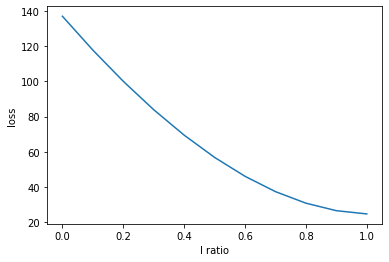

In [30]:
x = [i * 0.1 for i in range(11)]
y = losses
plt.plot(x, y)
plt.xlabel('l ratio')
plt.ylabel('loss')
plt.show()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
در این دیتاست، lasso نتیجه بهتری داده‌است.
    </font>

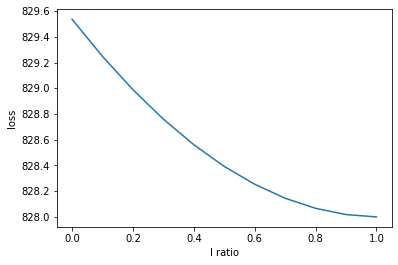

In [31]:
X, y = make_regression(n_samples=5000, n_features=3, noise=3)
y = y[:, np.newaxis]

for i in range (5000):
    if i % 4 == 0:
        X[i] = X[i] * 20
        y[i] = y[i] * 20
losses = []
for i in range(11):
    parameters = {
        "l_ratio" : i * 0.1,
        "l" : 0.1,
        "lr" : 0.0001,
        "epoch" : 10000
    }
    model = ElasticNet(**parameters)
    model.fit(X, y) 
    y_pred = model.predict(X)
    losses.append(mse_loss(y_pred, y))
x = [i * 0.1 for i in range(11)]
y = losses
plt.plot(x, y)
plt.xlabel('l ratio')
plt.ylabel('loss')
plt.show()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
همانطور که مشاهده می‌کنید با توجه به نیازی که داریم و نحوه توزیع دیتاست، استفاده از هر یک از این مدل ها می‌تواند مقدار خطا را کمتر می‌کند.
    </font>